<a href="https://colab.research.google.com/github/AnindoZ-lab/Wholesale-Customers-Analysis-Segmentation-and-Classification/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import umap

# Load the prepared dataset
url = 'https://raw.githubusercontent.com/AnindoZ-lab/Customer-Segmentation-Analysis/refs/heads/main/prepared_customer_data.csv'
df = pd.read_csv(url)

# Display the first few rows and basic statistics of the dataset
print(df.head())
print(df.describe())


   Customer ID  DaysSinceLastPurchase  PurchaseCount  TotalSpent
0        12346              -0.248511      -0.240443   -0.231189
1        12347              -0.900473      -0.118421   -0.068247
2        12348              -0.177203      -0.367347   -0.197516
3        12349              -0.492997       0.057291    0.087142
4        12351              -0.818977      -0.362466   -0.188269
        Customer ID  DaysSinceLastPurchase  PurchaseCount    TotalSpent
count   4383.000000           4.383000e+03   4.383000e+03  4.383000e+03
mean   15350.611453           8.632535e-17   3.404380e-17  2.431700e-17
std     1700.737934           1.000114e+00   1.000114e+00  1.000114e+00
min    12346.000000          -9.208465e-01  -4.600835e-01 -3.171461e+00
25%    13880.500000          -7.578561e-01  -3.771083e-01 -1.901084e-01
50%    15354.000000          -4.013146e-01  -2.502051e-01 -1.465932e-01
75%    16837.000000           4.747588e-01   3.776763e-02 -3.040350e-02
max    18287.000000           2.87

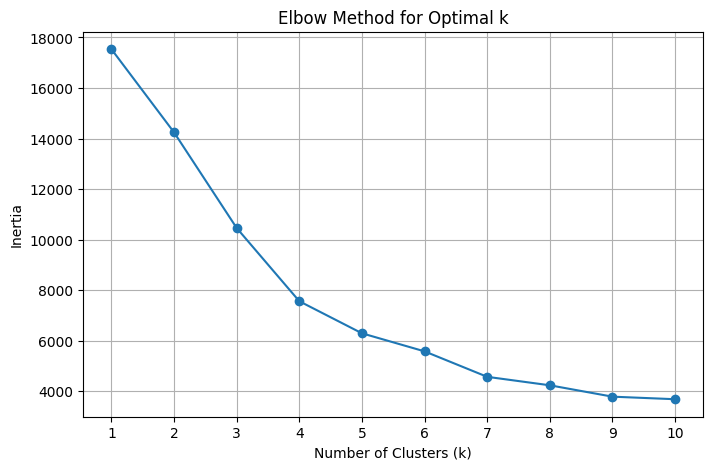

Cluster
0    1747
3    1707
1     916
2      13
Name: count, dtype: int64


In [5]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

# Implement the elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

# Choose the optimal number of clusters (let's say we choose 4 based on the elbow plot)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_data)

# Display the cluster distribution
cluster_distribution = df['Cluster'].value_counts()
print(cluster_distribution)


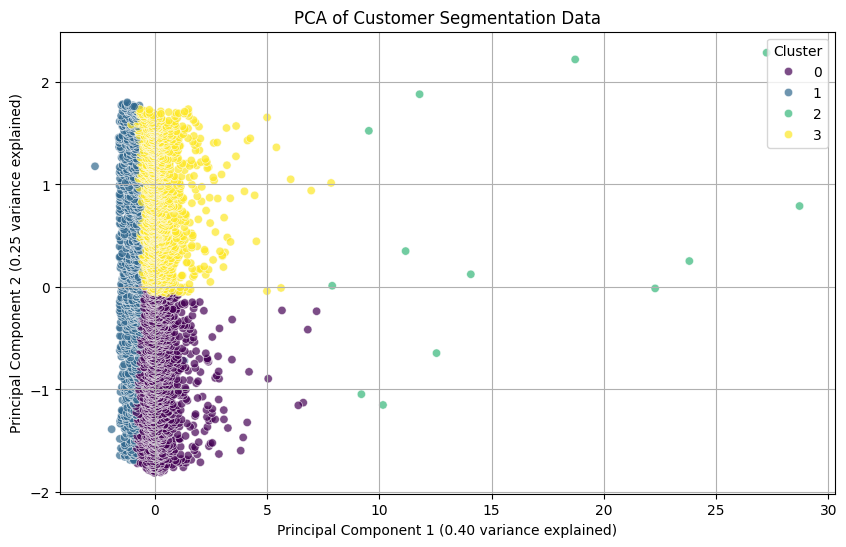

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


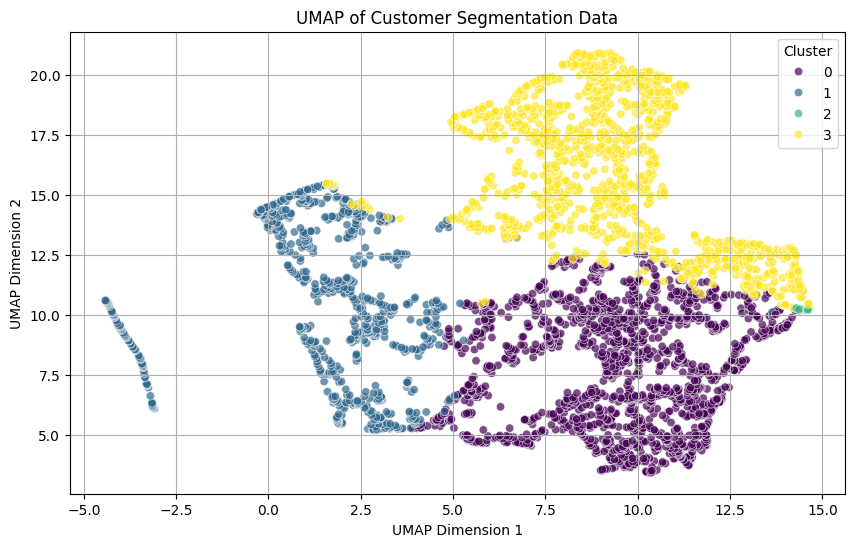

In [6]:
# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plotting PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Customer Segmentation Data')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2f} variance explained)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2f} variance explained)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Apply UMAP to reduce the data to 2 dimensions
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(normalized_data)

# Create a DataFrame for UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = df['Cluster']

# Plotting UMAP results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', data=umap_df, palette='viridis', alpha=0.7)
plt.title('UMAP of Customer Segmentation Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


Overall Statistics:
         Customer ID  DaysSinceLastPurchase  PurchaseCount    TotalSpent  \
count   4383.000000           4.383000e+03   4.383000e+03  4.383000e+03   
mean   15350.611453           8.632535e-17   3.404380e-17  2.431700e-17   
std     1700.737934           1.000114e+00   1.000114e+00  1.000114e+00   
min    12346.000000          -9.208465e-01  -4.600835e-01 -3.171461e+00   
25%    13880.500000          -7.578561e-01  -3.771083e-01 -1.901084e-01   
50%    15354.000000          -4.013146e-01  -2.502051e-01 -1.465932e-01   
75%    16837.000000           4.747588e-01   3.776763e-02 -3.040350e-02   
max    18287.000000           2.878867e+00   2.740494e+01  3.989859e+01   

           Cluster  
count  4383.000000  
mean      1.383299  
std       1.346434  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       3.000000  
max       3.000000  

Cluster Statistics:
 Cluster                                 0             1             2  \
Customer ID        

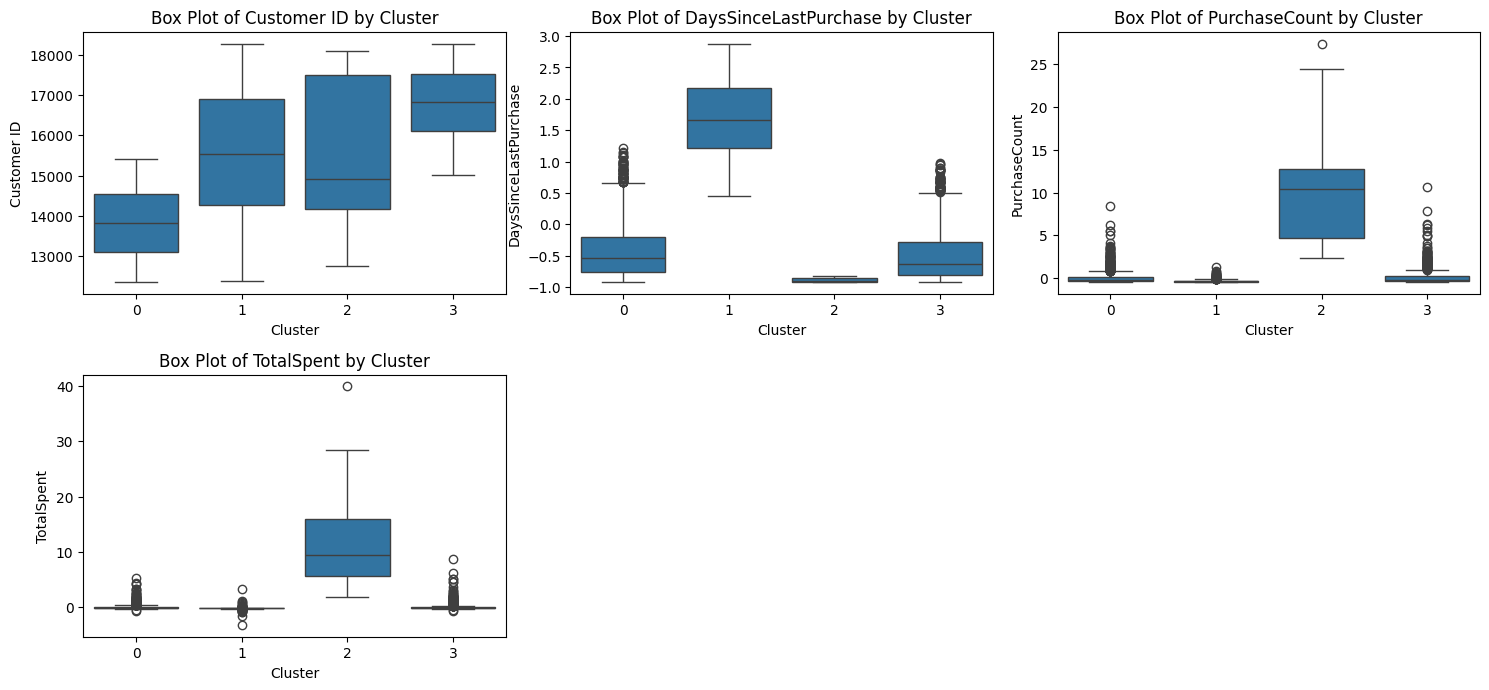

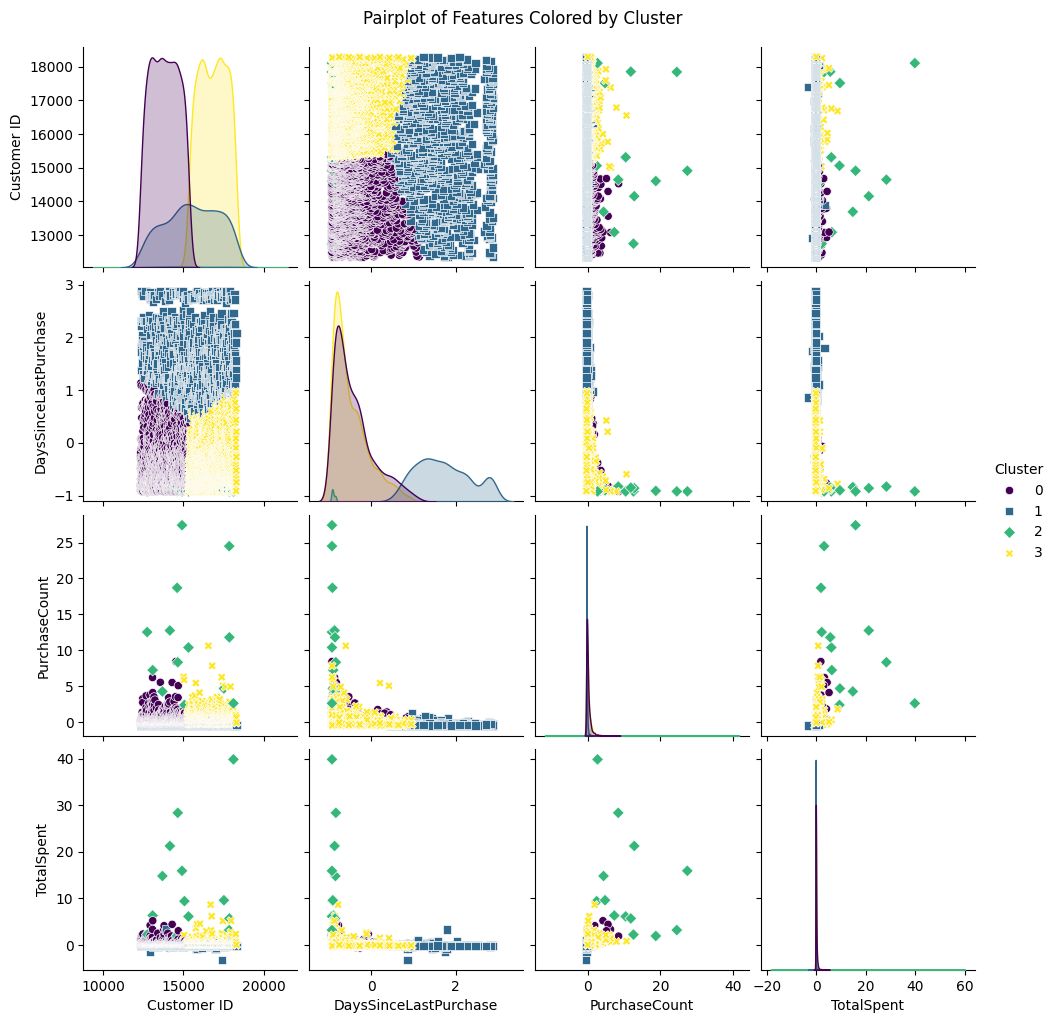

In [7]:
# Function to calculate cluster statistics
def cluster_statistics(df, cluster_col):
    overall_stats = df.describe()
    cluster_stats = df.groupby(cluster_col).describe().T
    return overall_stats, cluster_stats

# Display overall statistics and statistics for each cluster
overall_stats, cluster_stats = cluster_statistics(df, 'Cluster')
print("Overall Statistics:\n", overall_stats)
print("\nCluster Statistics:\n", cluster_stats)

# Create box plots to visualize feature distributions across clusters
features = df.columns[:-1]  # Exclude the 'Cluster' column for box plots

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Generate a pairplot to visualize relationships between features for each cluster
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', markers=["o", "s", "D", "X"])
plt.suptitle('Pairplot of Features Colored by Cluster', y=1.02)
plt.show()
